In [60]:
import os
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.gridspec import GridSpec
from matplotlib.patches import Rectangle
import moviepy.video.io.ImageSequenceClip

In [61]:
# define the input directory
run_dir = '/Users/lbayne/desktop/ms274/model_output/diags'

In [62]:
delX = 1/625
delY = 19/10000
xgOrigin = -122.2635
ygOrigin = 36.5436
n_rows = 245
n_cols = 300

# recreate the grids that will be used in the model
xc = np.arange(xgOrigin+delX/2, xgOrigin+n_cols*delX, delX)
yc = np.arange(ygOrigin+delY/2, ygOrigin+n_rows*delY+delY/2, delY)
XC, YC = np.meshgrid(xc, yc)

In [91]:
#mid monterey bay
row = 100
col = 50

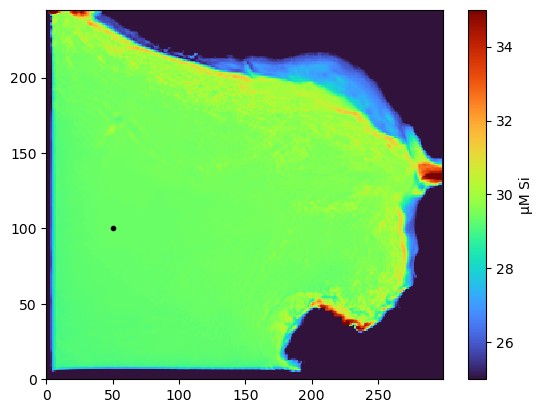

In [92]:
grid = np.fromfile(os.path.join(run_dir,'BGC_daily_Si',
                                'daily_Si.0000002880.data'), '>f4')
grid = grid.reshape((90,n_rows,n_cols))

C = plt.pcolormesh(grid[0,:,:-1], cmap='turbo', vmin=25,vmax=35)
plt.plot(col,row,'k.')
plt.colorbar(C, label='µM Si')
plt.show()

In [93]:
timestep_numbers = []
Si_values = []
for file_name in sorted(os.listdir(os.path.join(run_dir,'BGC_daily_Si'))):
    if file_name[-4:]=='data':
        # get the timestep number
        timestep_numbers.append(int(file_name.split('.')[-2]))

        grid = np.fromfile(os.path.join(run_dir,'BGC_daily_Si',
                                file_name), '>f4')
        grid = grid.reshape((90,n_rows,n_cols))
        Si_values.append(grid[0,row,col])

timestep_numbers = []
T_values = []
for file_name in sorted(os.listdir(os.path.join(run_dir,'TS_surf_daily_mean'))):
    if file_name[-4:]=='data':
        # get the timestep number
        timestep_numbers.append(int(file_name.split('.')[-2]))

        grid = np.fromfile(os.path.join(run_dir,'TS_surf_daily_mean',
                                file_name), '>f4')
        grid = grid.reshape((2,n_rows,n_cols))
        T_values.append(grid[0,row,col])

timestep_numbers = []
sal_values = []
for file_name in sorted(os.listdir(os.path.join(run_dir,'TS_surf_daily_mean'))):
    if file_name[-4:]=='data':
        # get the timestep number
        timestep_numbers.append(int(file_name.split('.')[-2]))

        grid = np.fromfile(os.path.join(run_dir,'TS_surf_daily_mean',
                                file_name), '>f4')
        grid = grid.reshape((2,n_rows,n_cols))
        sal_values.append(grid[1,row,col])

In [110]:
upwelling_event_1 = 574000
upwelling_event_2 = 610000
upwelling_event_3 = 631000

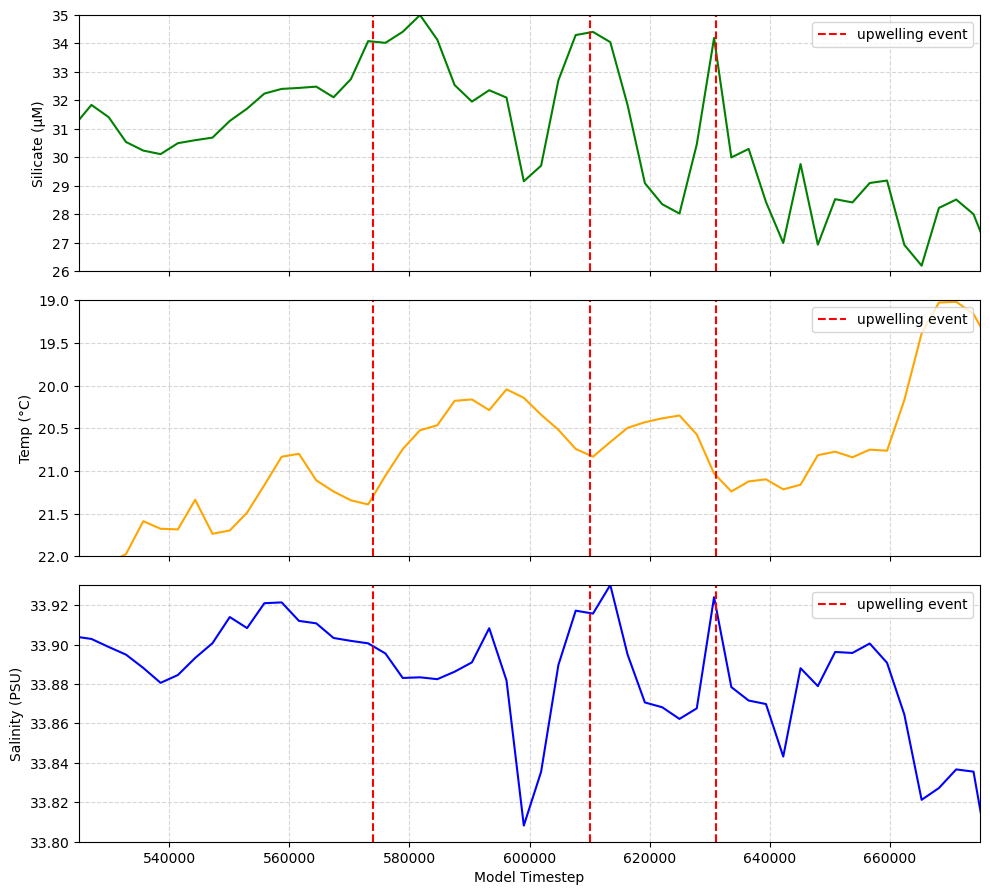

In [111]:
fig, ax = plt.subplots(3, 1, figsize=(10,9), sharex=True)

# Silicate
ax[0].plot(timestep_numbers, Si_values, 'green')
ax[0].set_ylabel('Silicate (µM)')
ax[0].grid(linestyle='--', alpha=0.5)
ax[0].axvline(x=upwelling_event_1, color='red', linestyle='--', linewidth=1.5) #3.8 day lag
ax[0].axvline(x=upwelling_event_2, color='red', linestyle='--', linewidth=1.5) #3.4 day lag
ax[0].axvline(x=upwelling_event_3, color='red', linestyle='--', linewidth=1.5, label = 'upwelling event') #3.4 day lag
ax[0].set_xlim(525000, 675000)
ax[0].set_ylim(26, 35)
ax[0].legend(loc='upper right')


# Temperature
ax[1].plot(timestep_numbers, T_values, 'orange')
ax[1].set_ylabel('Temp (°C)')
ax[1].grid(linestyle='--', alpha=0.5)
ax[1].set_xlim(525000, 675000)
ax[1].set_ylim(22, 19)
ax[1].axvline(x=upwelling_event_1, color='red', linestyle='--', linewidth=1.5)
ax[1].axvline(x=upwelling_event_2, color='red', linestyle='--', linewidth=1.5)
ax[1].axvline(x=upwelling_event_3, color='red', linestyle='--', linewidth=1.5, label = 'upwelling event')
ax[1].legend(loc='upper right')

# Salinity
ax[2].plot(timestep_numbers, sal_values, 'blue')
ax[2].set_ylabel('Salinity (PSU)')
ax[2].set_xlabel('Model Timestep')
ax[2].grid(linestyle='--', alpha=0.5)
ax[2].set_xlim(525000, 675000)
ax[2].set_ylim(33.8, 33.93)
ax[2].axvline(x=upwelling_event_1, color='red', linestyle='--', linewidth=1.5)
ax[2].axvline(x=upwelling_event_2, color='red', linestyle='--', linewidth=1.5)
ax[2].axvline(x=upwelling_event_3, color='red', linestyle='--', linewidth=1.5, label = 'upwelling event')
ax[2].legend(loc='upper right')

plt.tight_layout()
plt.savefig('/Users/lbayne/desktop/ms274/model_output/midbay_timeseries.png', dpi=300)

Setting no xlimits potentially shows the models spin up to 500000 timesteps...
Keeping the same x min and max as the previous near shore timeseries visualizes the smaller scale of changes in the outter bay region.

These time series show more upwelling-like events where high nutrient concentrations coincide with higher salinity and lower temperatures. This pattern is consistent with upwelling occurring along the broader central California coast; however, relative to Monterey Bay, the strongest upwelling may be taking place north of the bay, with the resulting cold, nutrient-rich surface waters subsequently being transported southward and downward into the outer bay. In this scenario, the model is detecting the signature of upwelled water primarily in offshore or outer-bay regions rather than inside Monterey Bay itself.

Additionally, the complex nearshore processes influenced by the Monterey Submarine Canyon, such as mixing, internal waves, and localized retention, may obscure or alter the classic upwelling signal within the inner bay. As a result, the model may not capture nearshore upwelling as clearly, instead highlighting upwelling signatures that develop outside the bay or along the northern coast before being advected into the region.